In [750]:
import pandas as pd
pd.set_option('display.max_rows', None)
from datetime import datetime as dt
import os
import re
import xlrd
import openpyxl
import seaborn
import matplotlib
import numpy as np
import statsmodels
import sklearn
import calendar
import warnings
warnings.filterwarnings("ignore")

In [621]:
folder1 = r'/Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia'

In [846]:
download1 = r'/Users/danielececcarelli/Downloads'

In [622]:
items1 = os.listdir(folder1)
items1

['.DS_Store', 'Dati U6', 'Dati U1', 'Descrizione dati e spunti.docx']

In [623]:
items2 = []
for i in items1:
    if i[:6] == 'Dati U':
        items2.append(i)
    
folder_pod = []
for i in items2:
    folder2 = os.path.join(folder1, i)
    folder_pod.append(folder2)
    
folder_pod

['/Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U6',
 '/Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U1']

In [624]:
folder_year = []
for i in folder_pod:
    folder3 = os.listdir(i)  #year name
    for y in folder3:
        if y[:1] == 'A':
            y2 = os.path.join(i,y)
            folder_year.append(y2)
  
            
folder_year

['/Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U6/Anno2018',
 '/Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U6/Anno2020',
 '/Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U6/Anno2019',
 '/Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U1/Anno2018',
 '/Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U1/Anno2020',
 '/Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U1/Anno2019']

In [625]:
file_path = []
file_name = []
for i in folder_year:
    i2 = os.listdir(i)  #year name
    if len(i2) > 12:
        print('check folder: ',i ,' numero file mensili', len(i2))
    for y in i2:
        y2 = os.path.join(i,y)
        file_path.append(y2)
        file_name.append(y)

#file_name

check folder:  /Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U6/Anno2018  numero file mensili 13
check folder:  /Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U6/Anno2020  numero file mensili 16
check folder:  /Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U6/Anno2019  numero file mensili 14
check folder:  /Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U1/Anno2018  numero file mensili 14
check folder:  /Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U1/Anno2020  numero file mensili 14
check folder:  /Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U1/Anno2019  numero file mensili 13


In [626]:
#file_name
#let's try to correct the file names
#at the moment, this cell is not connected to the rest of the script
file_name_correct = []
initials_month = ['Gen','Feb','Mar','Apr','Mag','Giu','Lug','Ago','Set','Ott','Nov','Dic']
for i in file_name:
    if i[:3] in initials_month:
        file_name_correct.append(i)
    elif i[:1] == 'U':
        i_new = i[3:]
        file_name_correct.append(i)

#file_name_correct

In [627]:
dataframes_list = []
for i in file_path:
    if i.endswith('.csv'):
        w = pd.read_csv(i, sep=';')
        if len(w.columns) > 8:
            w2 = pd.read_csv(i, sep=';', decimal=",",usecols=[0,1,2,3,4,5,6,7])
            dataframes_list.append(w2)
        #elif len(w.columns) == 3:
        #    w3 = pd.read_csv(i, sep=';', usecols=[0,1,2])
        #    dataframes_list.append(w3)
        #elif len(w.columns) ==1:
        #    w99 = pd.read_csv(i)
        #    dataframes_list.append(w99)
        else:
            dataframes_list.append(w)
    elif i.endswith('.xlsx'):
        w = pd.read_excel(i)
        if len(w.columns) > 8:
            w2 = pd.read_excel(i, usecols=[0,1,2,3,4,5,6,7])
            dataframes_list.append(w2)
        #elif len(w.columns) == 3:
        #    w3 = pd.read_excel(i, usecols=[0,1,2])
        #    dataframes_list.append(w3)
        else:
            dataframes_list.append(w)
    else:
        w = pd.read_excel(i)
        if len(w.columns) > 8:
            w2 = pd.read_excel(i, usecols=[0,1,2,3,4,5,6,7])
            dataframes_list.append(w2)
        #elif len(w.columns) == 3:
        #    w3 = pd.read_excel(i, usecols=[0,1,2])
        #    dataframes_list.append(w3)
        else:
            dataframes_list.append(w)
        
if len(dataframes_list) == len(file_path):
    print('ok, all dataframes have been appended')
    print('number of appended dataframes: ', len(dataframes_list))
else:
    print('be careful')
    
    
dict_dataframes = dict(zip(file_path, dataframes_list))

ok, all dataframes have been appended
number of appended dataframes:  84


In [628]:
columns_dataframes = []
len_columns_dataframes = []
for i in dataframes_list:
    ww = i.columns
    zz = len(ww)
    columns_dataframes.append(ww)
    len_columns_dataframes.append(zz)
    
#print(len_columns_dataframes)

list44 = [file_name, file_path, len_columns_dataframes]
names0 = ['file_name','file_path','len_columns_dataframes']
dict_check = {'file_name':file_name , 'file_path': file_path, 'len_columns_dataframes':len_columns_dataframes}
df_check = pd.DataFrame(dict_check)
df_check1 = df_check[df_check['len_columns_dataframes']!=8]
print(df_check1.shape)
print(df_check1)



(14, 3)
                                            file_name  \
14  U6_Ottobre_20201109_114307412_IT012E00491824_2...   
23  U6_sett_2020_IT012E00491824_20200901_20200930.csv   
24                    U6_Dic_20210_IT012E00491824.csv   
26   U6_NOV_2020_IT012E00491824_20201101_20201130.csv   
28  U6_Agosto_20201109_114712332_IT012E00491824_20...   
41  U6_Novembre_2019_20201109120532475_IT012E00491...   
60  U1_nov_2020_20201202101319092_IT012E00491869_2...   
61  U1_ago_2020_20201202101351030_IT012E00491869_2...   
63   U1_ott_2020_IT012E00491869_20201001_20201031.csv   
64  Copia di U1_gennaio2020_14066_20200218142630_P...   
65                     U1_DIC_2020_IT012E00491869.csv   
66  Copia di U1_gennaio2020_14066_20200218142630_P...   
68  U1_Luglio_20200831112713541_IT012E00491869_202...   
69  U1_sett_2020_20201202101338266_IT012E00491869_...   

                                            file_path  len_columns_dataframes  
14  /Users/danielececcarelli/Documents/2 - Data Sc...   

In [629]:
df_check_1_columns = df_check[df_check['len_columns_dataframes']==1]
df_check_3_columns = df_check[df_check['len_columns_dataframes']==3]

df_1_columns_list = list(df_check_1_columns['file_path'])
df_3_columns_list = list(df_check_3_columns['file_path'])

appended_1 = []
appended_3 = []

number_cols_1 = []
number_cols_3 = []

for i in df_1_columns_list:
    if i.endswith('.csv'):
        df = pd.read_csv(i)
        df_len = len(df.columns)
        appended_1.append(df)
        number_cols_1.append(df_len)
    elif i.endswith('.xlsx'):
        df = pd.read_excel(i)
        df_len = len(df.columns)
        appended_1.append(df)
        number_cols_1.append(df_len)
    elif i.endswith('.xltx'):
        df = pd.read_excel(i)
        df_len = len(df.columns)
        appended_1.append(df)
        number_cols_1.append(df_len)

for i in df_3_columns_list:
    if i.endswith('.csv'):
        df = pd.read_csv(i)
        df_len = len(df.columns)
        appended_3.append(df)
        number_cols_3.append(df_len)
    elif i.endswith('.xlsx'):
        df = pd.read_excel(i)
        df_len = len(df.columns)
        appended_3.append(df)
        number_cols_3.append(df_len)
    elif i.endswith('.xltx'):
        df = pd.read_excel(i)
        df_len = len(df.columns)
        appended_3.append(df)
        number_cols_3.append(df_len)
        
print(number_cols_1)
print(number_cols_3)


[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[3, 3]


In [630]:
# script for 1-column dataframe

def data_cleaning_1_column(df):
    rename_dict = {'POD':'col0'}
    df.rename(columns=rename_dict,inplace=True)
    df = df[['col0']]
    #df.head()

    list_new_col0 = ['POD', 'DATA', 'ORA', 'FL_ORA_LEGALE', 'CONSUMO_ATTIVA_PRELEVATA',
                     'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA', 'col1']


    df[list_new_col0] = df['col0'].str.split(';', 6, expand=True)
    df.drop(['col0'], axis=1, inplace=True)

    new_cols2 = ['POTENZA_MASSIMA', 'TIPO_DATO']
    df[new_cols2] = df['col1'].str.split(';', 1, expand=True)
    df.drop(['col1'], axis=1, inplace=True)
    uni1 = list(df['POTENZA_MASSIMA'].unique())
    if uni1[0] == '':
        df['POTENZA_MASSIMA'] = np.nan
    uni2 = list(df['TIPO_DATO'].unique())
    if uni2[0] == 'E;':
        df['TIPO_DATO'] = 'E'
    
    
    df['CONSUMO_ATTIVA_PRELEVATA'] = df['CONSUMO_ATTIVA_PRELEVATA'].astype(float)
    df['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA'] = df['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA'].astype(float)


    int_cols = ['DATA', 'ORA']
    for i in int_cols:
        df[i] = df[i].astype(int)
    
    #uni1 = list(df['POTENZA_MASSIMA'].unique())
    #if uni1[0] != np.nan:
    #    df['POTENZA_MASSIMA'] = df['POTENZA_MASSIMA'].astype(int)

    col_list11 = ['POD', 'DATA', 'ORA', 'FL_ORA_LEGALE', 'CONSUMO_ATTIVA_PRELEVATA',
           'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA', 'POTENZA_MASSIMA', 'TIPO_DATO']

    uni = list(df['FL_ORA_LEGALE'].unique())
    if uni[0] == '+01':
        df['FL_ORA_LEGALE'] = 1
        df['FL_ORA_LEGALE'] = df['FL_ORA_LEGALE'].astype(int)
    elif uni[0] == '+02':
        df['FL_ORA_LEGALE'] = 2
        df['FL_ORA_LEGALE'] = df['FL_ORA_LEGALE'].astype(int)

    df = df[col_list11]
    #print(df.info())
    #print('')
    #print(df.head)


    return df

In [631]:
#use this for 3-columns dataframe

def data_cleaning_3_column(df):
    rename_dict = {'POD;DATA;ORA;FL_ORA_LEGALE;CONSUMO_ATTIVA_PRELEVATA;CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA;POTENZA_MASSIMA;TIPO_DATO':'col0',
                   'Unnamed: 1':'col1', 'Unnamed: 2':'col2'}
    df.rename(columns=rename_dict,inplace=True)
    #df.head()
        
    list_new_col0 = ['POD', 'DATA', 'ORA', 'FL_ORA_LEGALE', 'CONSUMO_ATTIVA_PRELEVATA_part1']
       # 'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA', 'POTENZA_MASSIMA', 'TIPO_DATO']
    
    df[list_new_col0] = df['col0'].str.split(';', -1, expand=True)
    
    list_new_col1 = ['CONSUMO_ATTIVA_PRELEVATA_part2','CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA_part1']
    df[list_new_col1] = df['col1'].str.split(';', 1, expand=True)
    
    
    list_new_col2 = ['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA_part2','POTENZA_MASSIMA','TIPO_DATO']
    df[list_new_col2] = df['col2'].str.split(';', -1, expand=True)
    
    old_cols = ['col0','col1','col2']
    df.drop(old_cols, axis=1, inplace=True)
    
    for i in df.columns:
        df[i] = df[i].astype(str)

    #df.info()

    df['CONSUMO_ATTIVA_PRELEVATA'] = df['CONSUMO_ATTIVA_PRELEVATA_part1']+'.'+df['CONSUMO_ATTIVA_PRELEVATA_part2']

    df['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA'] = df['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA_part1']+'.'+df['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA_part2']

    df['CONSUMO_ATTIVA_PRELEVATA'] = df['CONSUMO_ATTIVA_PRELEVATA'].astype(float)
    df['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA'] = df['CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA'].astype(float)

    old_cols = ['CONSUMO_ATTIVA_PRELEVATA_part1','CONSUMO_ATTIVA_PRELEVATA_part2',
                'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA_part1','CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA_part2']
    df.drop(old_cols, axis=1, inplace=True)


    int_cols = ['DATA', 'ORA','POTENZA_MASSIMA']
    for i in int_cols:
        df[i] = df[i].astype(int)
    
    col_list11 = ['POD', 'DATA', 'ORA', 'FL_ORA_LEGALE', 'CONSUMO_ATTIVA_PRELEVATA',
           'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA', 'POTENZA_MASSIMA', 'TIPO_DATO']
    
    uni = list(df['FL_ORA_LEGALE'].unique())
    if uni[0] == '+01':
        df['FL_ORA_LEGALE'] = 1
        df['FL_ORA_LEGALE'] = df['FL_ORA_LEGALE'].astype(int)
    elif uni[0] == '+02':
        df['FL_ORA_LEGALE'] = 2
        df['FL_ORA_LEGALE'] = df['FL_ORA_LEGALE'].astype(int)
    
    df = df[col_list11]
    #print(df.info())
    #print('')
    #print(df.head)

    return df


In [632]:
#let's work with dataframes that initially had a single column or jut 3 columns

appended_1_new = []
appended_3_new = []

for i in appended_1:
    i = data_cleaning_1_column(i)
    appended_1_new.append(i)
    

for i in appended_3:
    i = data_cleaning_3_column(i)
    appended_3_new.append(i)
    
#print(appended_1_new)
#print(appended_3_new)

In [633]:
#for i in appended_1_new:
#    print(i.info())

In [634]:
#let's check if all dataframe have a "DATA" column with only integeres numbers

reference1 = 'int64'
reference2 = appended_1_new[0]
reference2 = reference2.dtypes[1]
reference2==reference1

for i in appended_1_new:
    if i.dtypes[1] == reference1 and i.dtypes[2] == reference1:
        #print(appended_1_new.index(i))
        print('no warning')

for i in appended_3_new:
    if i.dtypes[1] == reference1 and i.dtypes[2] == reference1:
        #print(appended_1_new.index(i))
        print('no warning')



no warning
no warning
no warning
no warning
no warning
no warning
no warning
no warning
no warning
no warning
no warning
no warning
no warning
no warning


In [635]:
#break

In [636]:
#let's work with regular dataframes
#df_check_8_columns
df_check_8_columns = df_check[df_check['len_columns_dataframes']==8]  #correct dataframes
df_8_columns_list = list(df_check_8_columns['file_path'])

appended_8 = []
number_cols_8 = []

for i in df_8_columns_list:
    if i.endswith('.csv'):
        df = pd.read_csv(i, sep=';', decimal=",")  #,usecols=[0,1,2,3,4,5,6,7])
        df = df.iloc[:, 0:8]  #select first 8 columns
        df_len = len(df.columns)
        appended_8.append(df)
        number_cols_8.append(df_len)
    elif i.endswith('.xlsx'):
        df = pd.read_excel(i) #,usecols=[0,1,2,3,4,5,6,7])
        df = df.iloc[:, 0:8]  #select first 8 columns
        df_len = len(df.columns)
        appended_8.append(df)
        number_cols_8.append(df_len)
    elif i.endswith('.xltx'):
        df = pd.read_excel(i) #,usecols=[0,1,2,3,4,5,6,7])
        df = df.iloc[:, 0:8]  #select first 8 columns
        df_len = len(df.columns)
        appended_8.append(df)
        number_cols_8.append(df_len)

#print(number_cols_8)
len(appended_8) == len(df_8_columns_list)

True

In [637]:
#let's check if all  "DATA" or "ORA" columns contain only integeres numbers
#the results of this cell show which dataframes need further cleaning

reference1 = 'int64'
error_list101 = []
count_error = []

for count, value in enumerate(appended_8):
    if value.dtypes[1] != reference1 or value.dtypes[2] != reference1:
        print(count, ' ', df_check_8_columns.iloc[count,0])
        error_list101.append(value)
        count_error.append(count)
print('')
print('')
for count, value in enumerate(appended_8):
    if value.dtypes[1] != reference1 or value.dtypes[2] != reference1:
        print(count, ' ', df_check_8_columns.iloc[count,1])

22   U6_luglio_20200831112745023_IT012E00491824_20200701_20200731.xlsx
28   Luglio2019_11090_20191127155556_PDO_12883450152_ELABORATO(1).xlsx
30   Luglio2019_11090_20191127155556_PDO_12883450152_ELABORATO.xlsx
67   Luglio2019_9808_20191104093538_PDO_12883450152.xltx


22   /Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U6/Anno2020/U6_luglio_20200831112745023_IT012E00491824_20200701_20200731.xlsx
28   /Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U6/Anno2019/Luglio2019_11090_20191127155556_PDO_12883450152_ELABORATO(1).xlsx
30   /Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U6/Anno2019/Luglio2019_11090_20191127155556_PDO_12883450152_ELABORATO.xlsx
67   /Users/danielececcarelli/Documents/2 - Data Science Lab/Final Project 2021/Dati Energia/Dati U1/Anno2019/Luglio2019_9808_20191104093538_PDO_12883450152.xltx


In [638]:
count_error

[22, 28, 30, 67]

In [639]:
count_error10 = []

cols_new1 = ['POD', 'DATA', 'ORA', 'FL_ORA_LEGALE', 'CONSUMO_ATTIVA_PRELEVATA',
       'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA', 'POTENZA_MASSIMA', 'TIPO_DATO']

for count, value in enumerate(appended_8):
    check_cols1 = list(value.columns)
    if check_cols1[0] != cols_new1[0] or check_cols1[1] != cols_new1[1] or check_cols1[2] != cols_new1[2] or check_cols1[3] != cols_new1[3] or check_cols1[4] != cols_new1[4] or check_cols1[5] != cols_new1[5] or check_cols1[6] != cols_new1[6] or check_cols1[7] != cols_new1[7]:
        print(count, ' ', df_check_8_columns.iloc[count,0])
        error_list101.append(value)
        count_error10.append(count)
print('')
print('')
for count, value in enumerate(appended_8):
    if check_cols1[0] != cols_new1[0] or check_cols1[1] != cols_new1[1] or check_cols1[2] != cols_new1[2] or check_cols1[3] != cols_new1[3] or check_cols1[4] != cols_new1[4] or check_cols1[5] != cols_new1[5] or check_cols1[6] != cols_new1[6] or check_cols1[7] != cols_new1[7]:
        print(count, ' ', df_check_8_columns.iloc[count,1])

22   U6_luglio_20200831112745023_IT012E00491824_20200701_20200731.xlsx
23   U6_giugno_17604_20200720130219_PDO_12883450152.xlsx
28   Luglio2019_11090_20191127155556_PDO_12883450152_ELABORATO(1).xlsx
30   Luglio2019_11090_20191127155556_PDO_12883450152_ELABORATO.xlsx




In [640]:
#count_error
#count_error10

count_error1 = count_error + count_error10
count_error2 = pd.DataFrame(count_error1, columns=['error'])
count_error2.sort_values(by=['error'], inplace=True)
count_error2 = list(count_error2['error'].unique())
count_error = count_error2
print(count_error)
print('')
print('numero errori: ', len(count_error))



[22, 23, 28, 30, 67]

numero errori:  5


In [642]:
df_problem = df_check_8_columns.iloc[count_error]
df_problem


,file_name,file_path,len_columns_dataframes
25,U6_luglio_20200831112745023_IT012E00491824_202...,/Users/danielececcarelli/Documents/2 - Data Sc...,8
27,U6_giugno_17604_20200720130219_PDO_12883450152...,/Users/danielececcarelli/Documents/2 - Data Sc...,8
33,Luglio2019_11090_20191127155556_PDO_1288345015...,/Users/danielececcarelli/Documents/2 - Data Sc...,8
35,Luglio2019_11090_20191127155556_PDO_1288345015...,/Users/danielececcarelli/Documents/2 - Data Sc...,8
81,Luglio2019_9808_20191104093538_PDO_12883450152...,/Users/danielececcarelli/Documents/2 - Data Sc...,8


In [643]:
df_problem_list = []
list_problems = list(df_problem['file_path'])
#len(list_problems)

for i in list_problems:
    ww = pd.read_excel(i)
    df_problem_list.append(ww)


In [644]:
df_problem_list[0].iloc[:, 0:13].head()

,"POD,DATA,ORA,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,IT012E00491824,20180930,2018.0,9.0,30.0,2018-09-30,24.0,234500,2,73.70,30.25,844.8,NaN
1,IT012E00491824,20200701,NaN,NaN,NaN,NaT,NaN,0,2,120.45,51.15,NaN,E
2,IT012E00491824,20200701,NaN,NaN,NaN,NaT,NaN,1500,2,120.45,51.15,NaN,E
3,IT012E00491824,20200701,NaN,NaN,NaN,NaT,NaN,3000,2,121.55,52.80,NaN,E
4,IT012E00491824,20200701,NaN,NaN,NaN,NaT,NaN,4500,2,122.10,52.80,NaN,E


In [645]:
df_brand_new = []

problem_fix0 = df_problem_list[0]
problem_fix0 = problem_fix0.iloc[1:, [0,1,7,8,9,10,11,12]]
cols_new1 = ['POD', 'DATA', 'ORA', 'FL_ORA_LEGALE', 'CONSUMO_ATTIVA_PRELEVATA',
       'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA', 'POTENZA_MASSIMA', 'TIPO_DATO']
problem_fix0 = problem_fix0.rename(columns=dict(zip(problem_fix0.columns,cols_new1)))
#cols_drop = [2,3,4,5,6]
#problem_fix1.drop(problem_fix1.columns[cols_drop],axis=1,inplace=True)
#problem_fix1.shape
print(problem_fix0.info())

df_brand_new.append(problem_fix0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 1 to 2976
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   POD                                   2976 non-null   object 
 1   DATA                                  2976 non-null   int64  
 2   ORA                                   2976 non-null   int64  
 3   FL_ORA_LEGALE                         2976 non-null   int64  
 4   CONSUMO_ATTIVA_PRELEVATA              2976 non-null   float64
 5   CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA  2976 non-null   float64
 6   POTENZA_MASSIMA                       0 non-null      float64
 7   TIPO_DATO                             2976 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 186.1+ KB
None


In [646]:
problem_fix2 = df_problem_list[2]
problem_fix2.iloc[:, :11].head()

,POD,Unnamed: 1,DATA,ORA,ORA.1,POTENZA ATTIVA KW,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO
0,IT012E00491824,luglio,20190701,0,00:00,638.0,2,159.50,69.3,877.8,E
1,IT012E00491824,luglio,20190701,1500,00:15,633.6,2,158.40,69.3,877.8,E
2,IT012E00491824,luglio,20190701,3000,00:30,635.8,2,158.95,70.4,877.8,E
3,IT012E00491824,luglio,20190701,4500,00:45,635.8,2,158.95,70.4,877.8,E
4,IT012E00491824,luglio,20190701,10000,01:00,635.8,2,158.95,71.5,877.8,E


In [647]:
problem_fix2 = problem_fix2.iloc[:, [0,2,3,6,7,8,9,10]]
problem_fix2.info()

df_brand_new.append(problem_fix2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   POD                                   2976 non-null   object 
 1   DATA                                  2976 non-null   int64  
 2   ORA                                   2976 non-null   int64  
 3   FL_ORA_LEGALE                         2976 non-null   int64  
 4   CONSUMO_ATTIVA_PRELEVATA              2976 non-null   float64
 5   CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA  2976 non-null   float64
 6   POTENZA_MASSIMA                       2976 non-null   float64
 7   TIPO_DATO                             2976 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 186.1+ KB


In [648]:
problem_fix3 = df_problem_list[3]
problem_fix3 = problem_fix3.iloc[:, [0,2,3,6,7,8,9,10]]
problem_fix3.info()

df_brand_new.append(problem_fix3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   POD                                   2976 non-null   object 
 1   DATA                                  2976 non-null   int64  
 2   ORA                                   2976 non-null   int64  
 3   FL_ORA_LEGALE                         2976 non-null   int64  
 4   CONSUMO_ATTIVA_PRELEVATA              2976 non-null   float64
 5   CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA  2976 non-null   float64
 6   POTENZA_MASSIMA                       2976 non-null   float64
 7   TIPO_DATO                             2976 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 186.1+ KB


In [649]:
problem_fix4 = df_problem_list[4]
problem_fix4 = problem_fix4.iloc[:, :8]
problem_fix4.head()

,POD,DATA,ORA,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO
0,IT012E00491869,20190701.0,0.0,2.0,48.0,27.6,542.4,E
1,IT012E00491869,20190701.0,1500.0,2.0,35.4,16.8,542.4,E
2,IT012E00491869,20190701.0,3000.0,2.0,48.6,27.6,542.4,E
3,IT012E00491869,20190701.0,4500.0,2.0,52.8,28.2,542.4,E
4,IT012E00491869,20190701.0,10000.0,2.0,48.6,27.6,542.4,E


In [650]:
pluto1 = problem_fix4[problem_fix4['DATA'].isna()]
pluto1

,POD,DATA,ORA,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO
2976,NaN,NaN,NaN,NaN,306493.8,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,297232.2,NaN,NaN,NaN


In [651]:
problem_fix4 = problem_fix4.dropna()

In [652]:
problem_fix4['DATA'] = problem_fix4['DATA'].astype(int)
problem_fix4['ORA'] = problem_fix4['ORA'].astype(int)
problem_fix4['FL_ORA_LEGALE'] = problem_fix4['FL_ORA_LEGALE'].astype(int)
problem_fix4.info()

df_brand_new.append(problem_fix4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2976 entries, 0 to 2975
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   POD                                   2976 non-null   object 
 1   DATA                                  2976 non-null   int64  
 2   ORA                                   2976 non-null   int64  
 3   FL_ORA_LEGALE                         2976 non-null   int64  
 4   CONSUMO_ATTIVA_PRELEVATA              2976 non-null   float64
 5   CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA  2976 non-null   float64
 6   POTENZA_MASSIMA                       2976 non-null   float64
 7   TIPO_DATO                             2976 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 209.2+ KB


In [653]:
problem_fix1 = df_problem_list[1]
#problem_fix1 = problem_fix1.iloc[:, :]
problem_fix1.head()

,POD,DATA,anno,mese,giorno,giorno/sett,ora,ORA,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA
0,IT012E00491869,20200601,2020,6,1,2020-06-01,1,0,2,34.2,13.8,405.6
1,IT012E00491869,20200601,2020,6,1,2020-06-01,1,1500,2,42.0,19.8,405.6
2,IT012E00491869,20200601,2020,6,1,2020-06-01,1,3000,2,46.8,24.0,405.6
3,IT012E00491869,20200601,2020,6,1,2020-06-01,1,4500,2,43.2,20.4,405.6
4,IT012E00491869,20200601,2020,6,1,2020-06-01,2,10000,2,33.0,12.6,405.6


In [654]:
problem_fix1 = problem_fix1.iloc[:, [0,1,7,8,9,10,11]]
problem_fix1['TIPO_DATO'] = 'E'
problem_fix1.head()

df_brand_new.append(problem_fix1)


In [655]:
len(df_brand_new) == len(count_error)

True

In [656]:
len(df_brand_new)

5

In [657]:
len(appended_8)

70

In [658]:
appended_8_new1 = []

for count, value in enumerate(appended_8):
    if count not in count_error:
        appended_8_new1.append(value)

print(len(appended_8_new1))
delta = len(appended_8)-len(count_error)
print(len(appended_8_new1) == delta)

65
True


In [659]:
appended_new = appended_1_new + appended_3_new + appended_8_new1 + df_brand_new
print(len(appended_new))
print(len(appended_new)==len(file_path)) #let's make sure we have all the dataframes

84
True


In [660]:
#let's check if all  "DATA" or "ORA" columns contain only integeres numbers

reference0 = 'object'
reference1 = 'int64'
reference2 = 'float64'
error_list102 = []

for count, value in enumerate(appended_new):
    if value.dtypes[1] != reference1 or value.dtypes[2] != reference1:
        print(count) #, value)
        error_list102.append(value)

for count, value in enumerate(appended_new):
    if value.dtypes[3] != reference1 or value.dtypes[0] != reference0:
        print(count) #, value)
        error_list102.append(value)



In [661]:
reference0 = 'object'
reference1 = 'int64'
reference2 = 'float64'
error_list102 = []

for count, value in enumerate(appended_new):
    if value.dtypes[4] != reference2:
        print(count) #, value)
        error_list102.append(value)

In [662]:
#appended_new[36].head()

In [663]:
reference0 = 'object'
reference1 = 'int64'
reference2 = 'float64'
error_list102 = []

for count, value in enumerate(appended_new):
    if value.dtypes[5] != reference2:
        print(count) #, value)
        error_list102.append(value)

In [664]:
reference0 = 'object'
reference1 = 'int64'
reference2 = 'float64'
error_list102 = []

for count, value in enumerate(appended_new):
    if value.dtypes[6] != reference2:
        print(count) #, value)
        error_list102.append(value)

12
13
14
16
17
19
25
30
31
32
33
34
35
36
40
44
49
54
58
59
61
62
63
64
65
66
69
76


In [665]:
reference0 = 'object'
reference1 = 'int64'
reference2 = 'float64'
#error_list102 = []

for count, value in enumerate(appended_new):
    if value.dtypes[7] != reference0:
        print(count) #, value)
        #error_list102.append(value)

In [666]:
#cols_new1

ddd = 5

for count, value  in enumerate(appended_new):
    list55 = list(value.columns)
    list55 = list55[ddd]
    if list55 != cols_new1[ddd]:
        print('warning nella lista appended_new')
        print(count)
    

In [667]:
#appended_8_new1[22].head()

In [668]:
for count, value in enumerate(appended_new):
    col_list_extra = list(value.columns)
    col_list_extra = col_list_extra[5]
    if col_list_extra == 'giorno/sett':
        print(count)
        print('warning: double check this dataframe')

In [669]:
cols_new1 = ['POD', 'DATA', 'ORA', 'FL_ORA_LEGALE', 'CONSUMO_ATTIVA_PRELEVATA',
       'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA', 'POTENZA_MASSIMA', 'TIPO_DATO']

In [670]:
def final_cleaning(df):
    df['DATA'] = df['DATA'].astype(str)
    df['ORA'] = df['ORA'].astype(str)
    df['POTENZA_MASSIMA'] = df['POTENZA_MASSIMA'].astype(float)
    df['ORA'] = df['ORA'].apply(lambda x:x.zfill(6))
    df['ORA'] = df['ORA'].apply(lambda x:x[:2]+':'+x[2:4]+':'+ x[4:6])
    df['Datetime'] = df['DATA']+' '+df['ORA']
    df['Datetime']=pd.to_datetime(df['Datetime'])
    df = df[['Datetime', 'POD', 'FL_ORA_LEGALE', 'CONSUMO_ATTIVA_PRELEVATA',
       'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA', 'POTENZA_MASSIMA', 'TIPO_DATO','DATA', 'ORA']]
    
    #df.head()
    return df

In [671]:
#final steps of the data-cleaning process

In [672]:
final_df = []
for i in appended_new:
    df1 = final_cleaning(i)
    final_df.append(df1)

In [673]:
reference0 = 'object'
reference1 = 'int64'
reference2 = 'float64'
error_list102 = []

for count, value in enumerate(appended_new):
    if value.dtypes[6] != reference2:
        print(count) #, value)
        error_list102.append(value)

In [674]:
final_df[0].head()

,Datetime,POD,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO,DATA,ORA
0,2020-10-01 00:00:00,IT012E00491824,2,86.90,29.15,NaN,E,20201001,00:00:00
1,2020-10-01 00:15:00,IT012E00491824,2,87.45,29.15,NaN,E,20201001,00:15:00
2,2020-10-01 00:30:00,IT012E00491824,2,86.90,28.60,NaN,E,20201001,00:30:00
3,2020-10-01 00:45:00,IT012E00491824,2,86.90,29.15,NaN,E,20201001,00:45:00
4,2020-10-01 01:00:00,IT012E00491824,2,86.90,29.70,NaN,E,20201001,01:00:00


In [675]:
#merge all the dataframes

In [676]:
#VALUTA SE DIVIDERE IL DATAFRAM GRANDE IN DUE DATAFRAME, UNO PER OGNI POD

In [680]:
#cols_new1 = ['POD', 'DATA', 'ORA', 'FL_ORA_LEGALE', 'CONSUMO_ATTIVA_PRELEVATA',
#       'CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA', 'POTENZA_MASSIMA', 'TIPO_DATO']

In [681]:
full_df = pd.concat(final_df,ignore_index=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236916 entries, 0 to 236915
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Datetime                              236916 non-null  datetime64[ns]
 1   POD                                   236916 non-null  object        
 2   FL_ORA_LEGALE                         236916 non-null  int64         
 3   CONSUMO_ATTIVA_PRELEVATA              236916 non-null  float64       
 4   CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA  236916 non-null  float64       
 5   POTENZA_MASSIMA                       198516 non-null  float64       
 6   TIPO_DATO                             236916 non-null  object        
 7   DATA                                  236916 non-null  object        
 8   ORA                                   236916 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory

In [682]:
full_df.rename(columns={'Datetime':'Timestamp_col'},inplace=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236916 entries, 0 to 236915
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Timestamp_col                         236916 non-null  datetime64[ns]
 1   POD                                   236916 non-null  object        
 2   FL_ORA_LEGALE                         236916 non-null  int64         
 3   CONSUMO_ATTIVA_PRELEVATA              236916 non-null  float64       
 4   CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA  236916 non-null  float64       
 5   POTENZA_MASSIMA                       198516 non-null  float64       
 6   TIPO_DATO                             236916 non-null  object        
 7   DATA                                  236916 non-null  object        
 8   ORA                                   236916 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory

In [683]:
print(full_df['POD'].unique())
print('numero POD: ', len(full_df['POD'].unique()))

['IT012E00491824' 'IT012E00491869']
numero POD:  2


In [686]:
full_df = full_df.sort_values(by=['POD','Timestamp_col'])
full_df.head(50)

,Timestamp_col,POD,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO,DATA,ORA
52512,2018-01-01 00:00:00,IT012E00491824,1,93.50,38.50,888.8,E,20180101,00:00:00
52513,2018-01-01 00:15:00,IT012E00491824,1,91.30,35.75,888.8,E,20180101,00:15:00
52514,2018-01-01 00:30:00,IT012E00491824,1,91.85,36.30,888.8,E,20180101,00:30:00
52515,2018-01-01 00:45:00,IT012E00491824,1,90.20,35.20,888.8,E,20180101,00:45:00
52516,2018-01-01 01:00:00,IT012E00491824,1,91.85,37.40,888.8,E,20180101,01:00:00
52517,2018-01-01 01:15:00,IT012E00491824,1,91.85,37.40,888.8,E,20180101,01:15:00
52518,2018-01-01 01:30:00,IT012E00491824,1,89.65,35.20,888.8,E,20180101,01:30:00
52519,2018-01-01 01:45:00,IT012E00491824,1,91.30,36.30,888.8,E,20180101,01:45:00
52520,2018-01-01 02:00:00,IT012E00491824,1,91.30,36.85,888.8,E,20180101,02:00:00
52521,2018-01-01 02:15:00,IT012E00491824,1,89.10,35.75,888.8,E,20180101,02:15:00


In [687]:
# let's drop all the excess rows and keep only unique values according to POD and Timestamp_col

In [689]:
# we will eliminate duplicate

In [690]:
full_df.drop_duplicates(subset=['POD', 'Timestamp_col'],inplace= True)

In [815]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207528 entries, 52512 to 29567
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Timestamp_col                         207528 non-null  datetime64[ns]
 1   POD                                   207528 non-null  object        
 2   FL_ORA_LEGALE                         207528 non-null  int64         
 3   CONSUMO_ATTIVA_PRELEVATA              207528 non-null  float64       
 4   CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA  207528 non-null  float64       
 5   POTENZA_MASSIMA                       169320 non-null  float64       
 6   TIPO_DATO                             207528 non-null  object        
 7   DATA                                  207528 non-null  object        
 8   ORA                                   207528 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
mem

In [816]:
# create a separate dataframe for each POD

pod_u1 = full_df[full_df['POD']=='IT012E00491824']
pod_u6 = full_df[full_df['POD']=='IT012E00491869']


In [817]:
pod_u1.describe()

,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA
count,102324.000000,102324.000000,102324.000000,81780.000000
mean,1.575935,131.293956,54.396545,827.850692
std,0.494203,39.293667,18.222779,127.765629
min,1.000000,0.000000,0.000000,444.400000
25%,1.000000,109.450000,42.900000,783.200000
50%,2.000000,125.400000,55.000000,864.600000
75%,2.000000,156.750000,67.100000,895.400000
max,2.000000,262.350000,113.300000,1049.400000


In [818]:
pod_u6.describe()

,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA
count,105204.000000,105204.000000,105204.000000,87540.000000
mean,1.587544,76.749572,37.066397,443.791857
std,0.492279,18.402331,10.112411,70.174759
min,1.000000,0.000000,0.000000,309.600000
25%,1.000000,64.800000,30.000000,381.600000
50%,2.000000,74.400000,36.600000,417.600000
75%,2.000000,87.000000,42.600000,480.000000
max,2.000000,157.200000,77.400000,628.800000


<AxesSubplot:xlabel='Timestamp_col'>

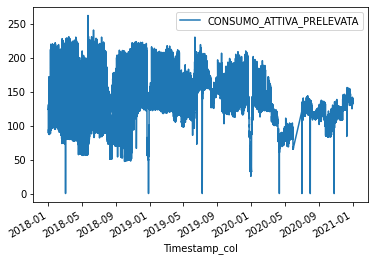

In [819]:
#test
pod_u1_test = pod_u1[['Timestamp_col','POD','CONSUMO_ATTIVA_PRELEVATA']]
pod_u1_test.set_index(['Timestamp_col'], inplace= True)
pod_u1_test.plot()

<AxesSubplot:xlabel='Timestamp_col'>

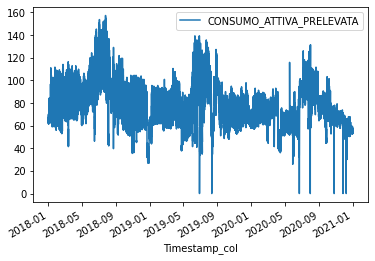

In [820]:
#test
pod_u6_test = pod_u6[['Timestamp_col','POD','CONSUMO_ATTIVA_PRELEVATA']]
pod_u6_test.set_index(['Timestamp_col'], inplace= True)
pod_u6_test.plot()

In [821]:
#test_continued, example of hourly data

pod_u1_hour = pod_u1.groupby(pd.Grouper(key='Timestamp_col',freq='H')).count()
pod_u6_hour = pod_u6.groupby(pd.Grouper(key='Timestamp_col',freq='H')).count()

print(pod_u1_hour.shape)
print(pod_u6_hour.shape)

(26304, 8)
(26304, 8)


In [822]:
test_u1 = pod_u1_hour[pod_u1_hour['POD']==0]
test_u6 = pod_u6_hour[pod_u6_hour['POD']==0]

print(test_u1.shape)
print(test_u6.shape)

(723, 8)
(3, 8)


In [823]:
test_u1

,POD,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO,DATA,ORA
Timestamp_col,,,,,,,,
2018-03-25 02:00:00,0,0,0,0,0,0,0,0
2019-03-31 02:00:00,0,0,0,0,0,0,0,0
2020-03-29 02:00:00,0,0,0,0,0,0,0,0
2020-06-01 00:00:00,0,0,0,0,0,0,0,0
2020-06-01 01:00:00,0,0,0,0,0,0,0,0
2020-06-01 02:00:00,0,0,0,0,0,0,0,0
2020-06-01 03:00:00,0,0,0,0,0,0,0,0
2020-06-01 04:00:00,0,0,0,0,0,0,0,0
2020-06-01 05:00:00,0,0,0,0,0,0,0,0


In [824]:
test_u6

,POD,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO,DATA,ORA
Timestamp_col,,,,,,,,
2018-03-25 02:00:00,0,0,0,0,0,0,0,0
2019-03-31 02:00:00,0,0,0,0,0,0,0,0
2020-03-29 02:00:00,0,0,0,0,0,0,0,0


In [826]:
print(pod_u1.shape)
print(pod_u6.shape)

(102324, 9)
(105204, 9)


In [827]:
batman = pod_u1
batman['date'] = pd.to_datetime(batman['Timestamp_col'])
batman.set_index('date', inplace=True)
batman.drop(['Timestamp_col'], axis=1, inplace=True)
batman = batman.asfreq('15Min')
pod_u1_new = batman
pod_u1_new.shape

(105216, 8)

In [828]:
batman = pod_u6
batman['date'] = pd.to_datetime(batman['Timestamp_col'])
batman.set_index('date', inplace=True)
batman.drop(['Timestamp_col'], axis=1, inplace=True)
batman = batman.asfreq('15Min')
pod_u6_new = batman
pod_u6_new.shape

(105216, 8)

In [832]:
u1_pod = pod_u1_new['POD'][0]
u6_pod = pod_u6_new['POD'][0]
pod_u1_new['POD'] = u1_pod
pod_u6_new['POD'] = u6_pod

In [833]:
#number of 15-minutes slots that are missing - POD U1
pod_u1_new['CONSUMO_ATTIVA_PRELEVATA'].isna().sum() 

2892

In [835]:
#number of 15-minutes slots that are missing - POD U6
pod_u6_new['CONSUMO_ATTIVA_PRELEVATA'].isna().sum() 

12

In [838]:
pod_u1_new.head(2)

,POD,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO,DATA,ORA
date,,,,,,,,
2018-01-01 00:00:00,IT012E00491824,1.0,93.5,38.50,888.8,E,20180101,00:00:00
2018-01-01 00:15:00,IT012E00491824,1.0,91.3,35.75,888.8,E,20180101,00:15:00


In [837]:
pod_u6_new.head(2)

,POD,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO,DATA,ORA
date,,,,,,,,
2018-01-01 00:00:00,IT012E00491869,1.0,64.8,21.6,446.4,E,20180101,00:00:00
2018-01-01 00:15:00,IT012E00491869,1.0,66.0,25.2,446.4,E,20180101,00:15:00


In [841]:
#first and last timestamp of each time series

# pod: IT012E00491824
print(pod_u1_new.index[0])
print(pod_u1_new.index[-1])

# pod: IT012E00491869
print(pod_u6_new.index[0])
print(pod_u6_new.index[-1])

2018-01-01 00:00:00
2020-12-31 23:45:00
2018-01-01 00:00:00
2020-12-31 23:45:00


In [859]:
#let's create a single dataframe

pod_u1_new1 = pod_u1_new
pod_u6_new1 = pod_u6_new
pod_u1_new1.reset_index(inplace=True)
pod_u6_new1.reset_index(inplace=True)
pod_list_final_version = [pod_u1_new1, pod_u6_new1]
full_df2 = pd.concat(pod_list_final_version,ignore_index=True)
full_df2.shape

(210432, 9)

In [860]:
full_df2.head(2)

,date,POD,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO,DATA,ORA
0,2018-01-01 00:00:00,IT012E00491824,1.0,93.5,38.50,888.8,E,20180101,00:00:00
1,2018-01-01 00:15:00,IT012E00491824,1.0,91.3,35.75,888.8,E,20180101,00:15:00


In [862]:
full_df2.tail(2)

,date,POD,FL_ORA_LEGALE,CONSUMO_ATTIVA_PRELEVATA,CONSUMO_REATTIVA_INDUTTIVA_PRELEVATA,POTENZA_MASSIMA,TIPO_DATO,DATA,ORA
210430,2020-12-31 23:30:00,IT012E00491869,1.0,55.2,28.2,NaN,E,20201231,23:30:00
210431,2020-12-31 23:45:00,IT012E00491869,1.0,53.4,25.8,NaN,E,20201231,23:45:00


In [863]:
files_download1 = os.listdir(download1)

complete_csv_name = 'pod_u1_u6_complete_time_series.csv'
complete_csv_name_path = os.path.join(download1, complete_csv_name)
complete_csv_name_path

if complete_csv_name in files_download1:
    print('file csv already exists')
else:
    full_df2.to_csv(complete_csv_name_path, sep=';', index=False)
    print('full_df2 dataframe exported to csv')
    print('')
    print('please check Downloads folder')

full_df2 dataframe exported to csv

please check Downloads folder


In [864]:
#these are the 3 final dataframes

# pod_u1_new        ---> dataframe for pod IT012E00491824
# pod_u6_new        ---> dataframe for pod IT012E00491869

# full_df2          ---> concatenated dataframe